In [1]:
"""Librairies nécessaires"""
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
"""Changement de directory pour lire les fichiers"""
import os
os.getcwd() #trouver le directory actuel 
os.chdir('/home/onyxia/work/Projet-Stat-App-2A')

In [3]:
"""Lecture du fichier dvf enrichi"""

emplacement_dvf_enrichi = '3.1) Données enrichies/dvf_enrichi_2021_to_2023.geojson'

df = gpd.read_file(emplacement_dvf_enrichi)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [4]:
dvf_enrichi = df.copy()

In [5]:
dvf_enrichi.columns

Index(['id_mutation', 'date_mutation', 'prix', 'log_prix',
       'nombre_pieces_principales', 'surface_reelle_bati', 'surface_carrez',
       'nombre_dependances', 'prix_au_m2_carrez', 'prix_au_m2_reel_bati',
       'adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_arrondissement', 'num_arrondissement', 'nom_quartier', 'longitude',
       'latitude', 'dist_min_lycee', 'nom_lycee', 'dist_min_grand_parc',
       'dist_min_square', 'nom_grand_parc', 'nom_square', 'dist_min_site_tour',
       'nom_site_tour', 'dist_min_stat', 'nom_stat', 'num_ligne',
       'dist_min_log_social', 'dist_min_voie_eau', 'geometry'],
      dtype='object')

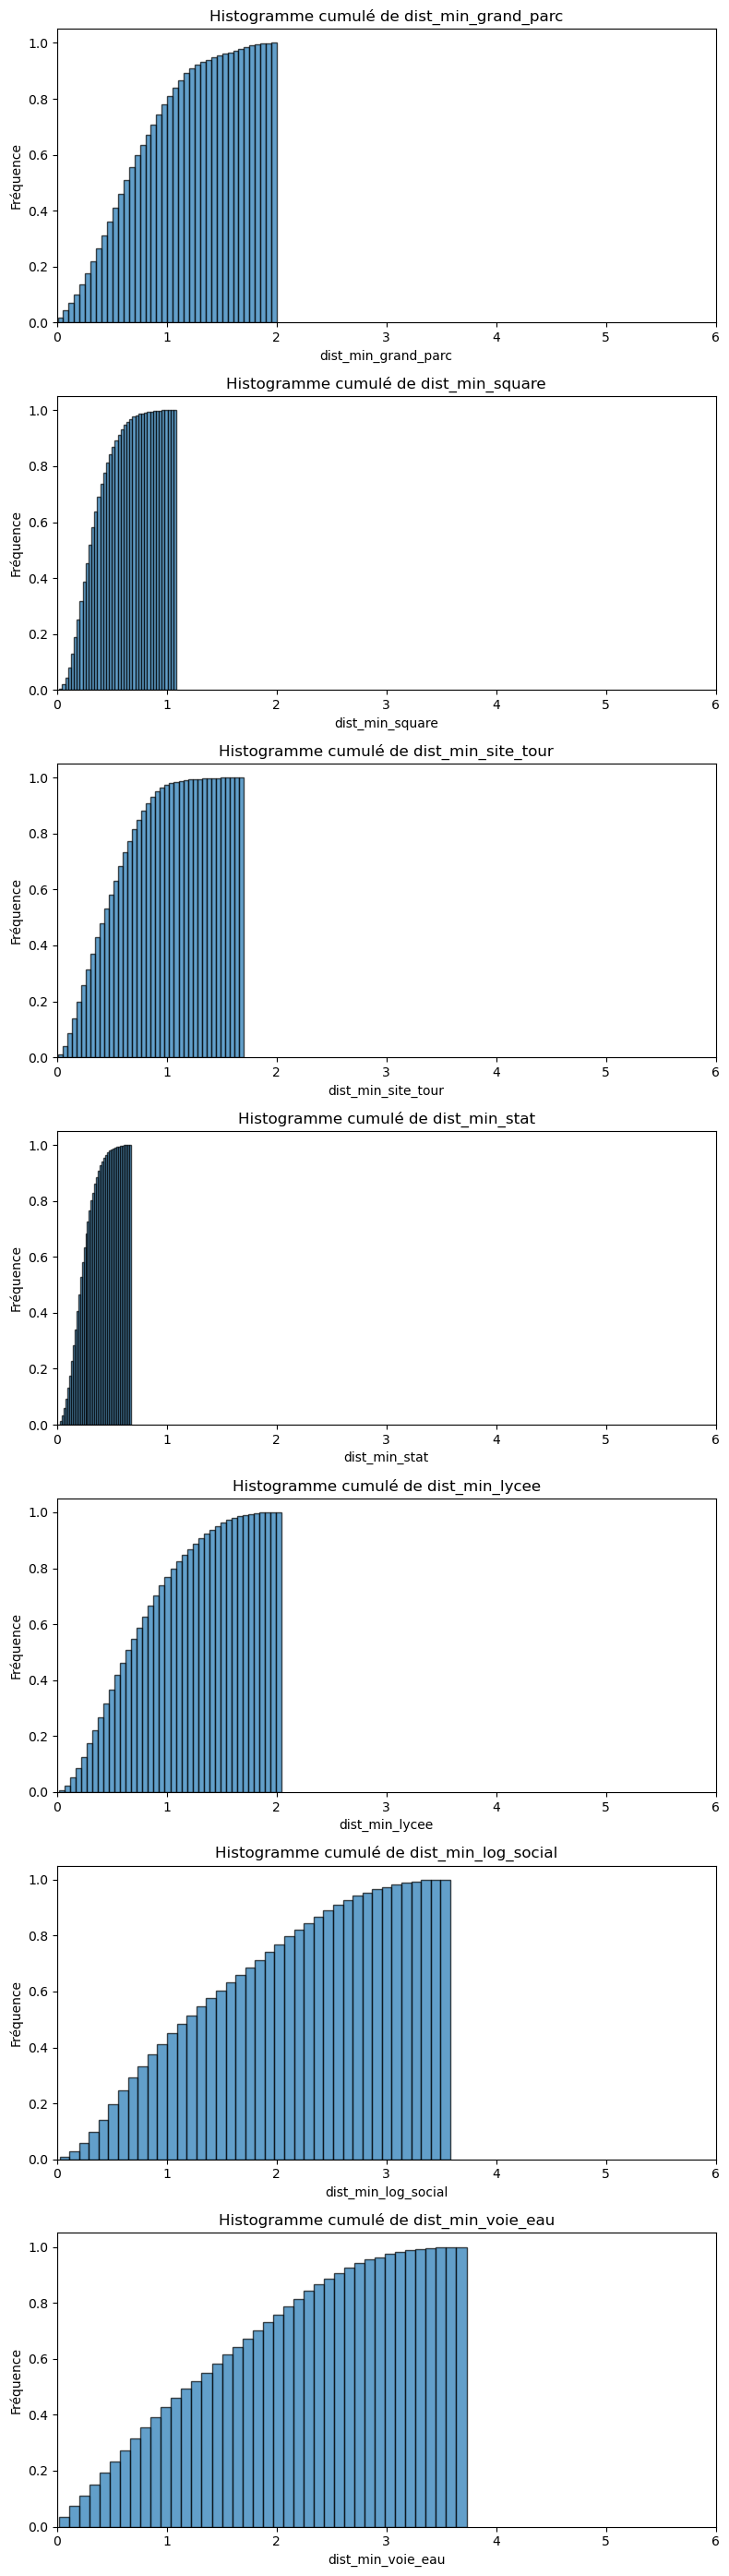

In [7]:
"""Histogrammes distances"""

liste_var_dist = ['dist_min_grand_parc', 'dist_min_square', 'dist_min_site_tour', 'dist_min_stat', 'dist_min_lycee', 'dist_min_log_social', 'dist_min_voie_eau']

# Créer une figure et des sous-plots
fig, axes = plt.subplots(nrows=len(liste_var_dist), ncols=1, figsize=(8, 4 * len(liste_var_dist)))

# Initialiser une plage commune pour l'axe x
x_range = (0, 6)  # Ajustez selon vos besoins

# Boucle pour créer les histogrammes
for i, variable in enumerate(liste_var_dist):
    # Créer un histogramme de l'effectif cumulé
    axes[i].hist(dvf_enrichi[variable], bins=40, edgecolor='black', alpha=0.7, density=True, cumulative=True)

    # Ajouter des étiquettes et un titre
    axes[i].set_xlabel(f'{variable}')
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'Histogramme cumulé de {variable}')

    # Définir la plage commune pour l'axe x
    axes[i].set_xlim(x_range)

# Ajuster l'espacement entre les sous-plots
plt.tight_layout()

plt.savefig('3.2) Données finales/histogrammes_distances.png')

# Afficher les histogrammes
plt.show()

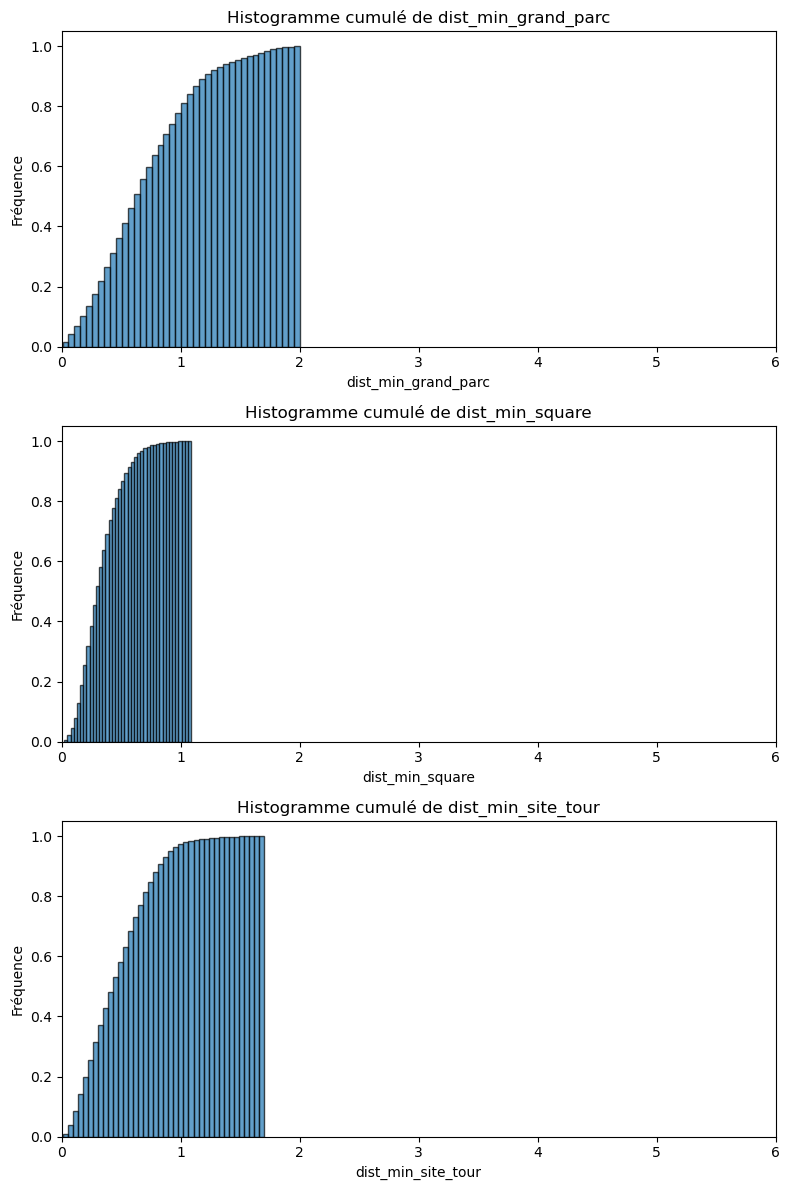

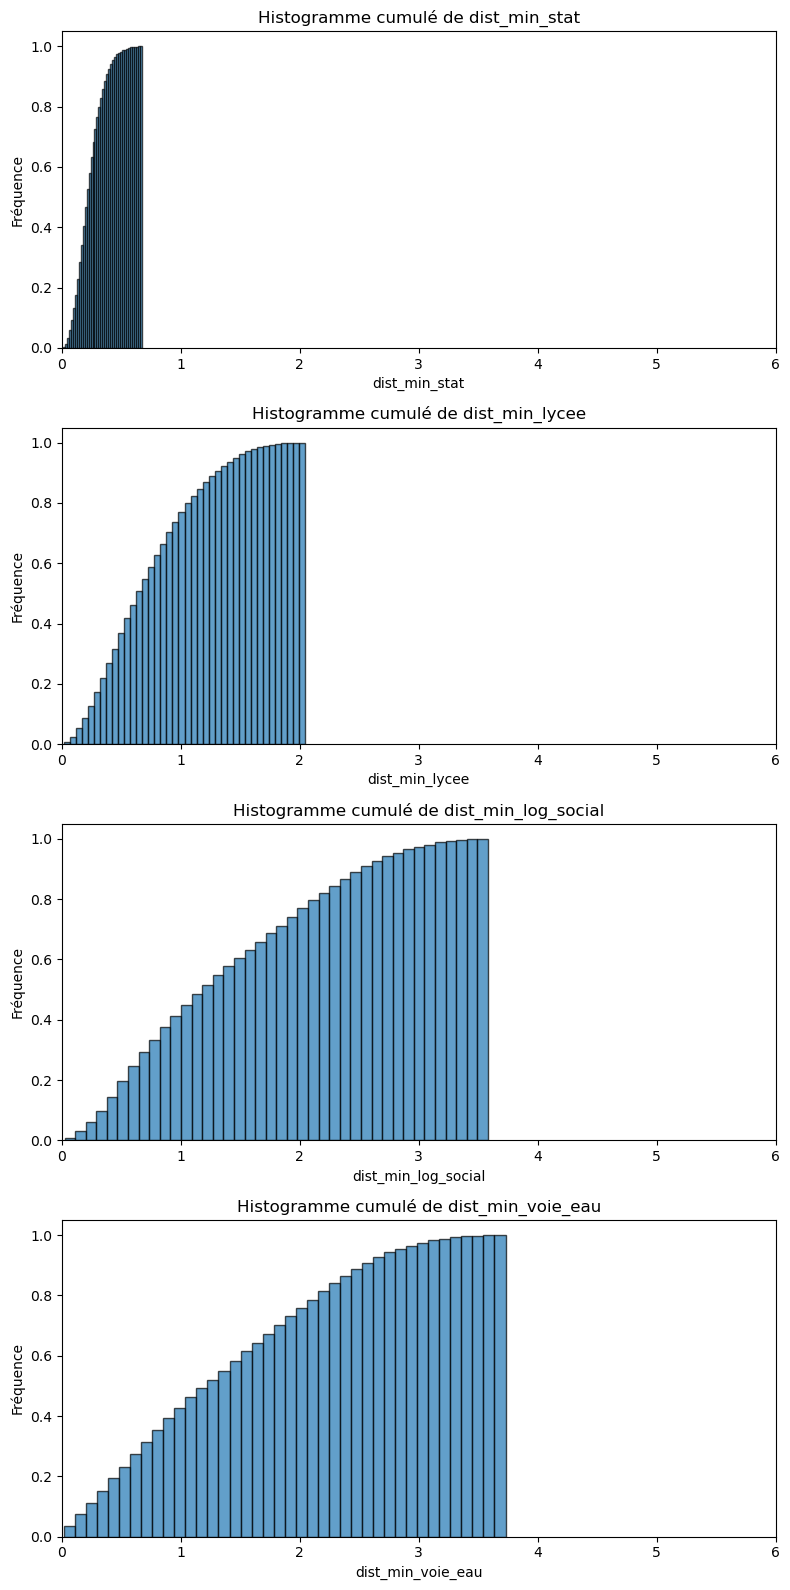

In [8]:
import matplotlib.pyplot as plt

liste_var_dist = ['dist_min_grand_parc', 'dist_min_square', 'dist_min_site_tour', 'dist_min_stat', 'dist_min_lycee', 'dist_min_log_social', 'dist_min_voie_eau']

# Créer une figure et des sous-plots pour le premier groupe (3 histogrammes)
fig1, axes1 = plt.subplots(nrows=3, ncols=1, figsize=(8, 4 * 3))

# Créer une figure et des sous-plots pour le second groupe (4 histogrammes)
fig2, axes2 = plt.subplots(nrows=4, ncols=1, figsize=(8, 4 * 4))

# Initialiser une plage commune pour l'axe x
x_range = (0, 6)  # Ajustez selon vos besoins

# Boucle pour créer les histogrammes dans le premier groupe
for i, variable in enumerate(liste_var_dist[:3]):
    axes1[i].hist(dvf_enrichi[variable], bins=40, edgecolor='black', alpha=0.7, density=True, cumulative=True)
    axes1[i].set_xlabel(f'{variable}')
    axes1[i].set_ylabel('Fréquence')
    axes1[i].set_title(f'Histogramme cumulé de {variable}')
    axes1[i].set_xlim(x_range)

# Ajuster l'espacement entre les sous-plots de la première figure
fig1.tight_layout()

# Boucle pour créer les histogrammes dans le second groupe
for i, variable in enumerate(liste_var_dist[3:]):
    axes2[i].hist(dvf_enrichi[variable], bins=40, edgecolor='black', alpha=0.7, density=True, cumulative=True)
    axes2[i].set_xlabel(f'{variable}')
    axes2[i].set_ylabel('Fréquence')
    axes2[i].set_title(f'Histogramme cumulé de {variable}')
    axes2[i].set_xlim(x_range)

# Ajuster l'espacement entre les sous-plots de la deuxième figure
fig2.tight_layout()

# Exporter la première figure
fig1.savefig('3.2) Données finales/histogrammes_distances_groupe1.png')

# Exporter la deuxième figure
fig2.savefig('3.2) Données finales/histogrammes_distances_groupe2.png')

# Afficher les deux figures
plt.show()


In [9]:
var_finales = ['id_mutation', 'date_mutation', 'prix', 'log_prix',
       'nombre_pieces_principales', 'surface_reelle_bati', 'surface_carrez',
       'nombre_dependances', 'prix_au_m2_carrez', 'prix_au_m2_reel_bati',
       'adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_arrondissement', 'num_arrondissement', 'nom_quartier',
        'dist_min_lycee', 'nom_lycee', 'dist_min_grand_parc',
       'dist_min_square', 'nom_grand_parc', 'nom_square', 'dist_min_site_tour',
       'nom_site_tour', 'dist_min_stat', 'nom_stat', 'num_ligne',
       'dist_min_log_social', 'dist_min_voie_eau', 'longitude', 'latitude', 'geometry']

In [10]:
"""Fonction qui permet de discrétiser les colonnes en fonction de valeurs qu'on spécifie"""

def create_indicator_columns(df, column_name, bins):
    
    # Discrétisation de la colonne en utilisant les intervalles définis
    df[column_name + '_disc'] = pd.cut(df[column_name], bins=bins, labels=False)
    
    # Création de colonnes indicatrices avec des valeurs 0 ou 1
    indicators = pd.get_dummies(df[column_name + '_disc'], prefix=column_name+'_ind', drop_first=True)
    
    # Convertir les valeurs booléennes en entiers (0 ou 1)
    indicators = indicators.astype(int)
    
    # Ajout des colonnes indicatrices au dataframe
    df = pd.concat([df, indicators], axis=1)

    # Ajout des colonnes à la liste des variables finales
    var_finales.extend(indicators.columns.tolist())

    #retirer du dataframe la colonne 'disc'
    df = df.drop(column_name + '_disc', axis=1)
    
    return df

In [11]:
"""Discrétisation des variables de distance"""

bins_dist_min_grand_parc = [0, 0.1, 0.25, 0.5, float('inf')]  #intervalles pour la distance aux parcs
dvf_enrichi = create_indicator_columns(dvf_enrichi, 'dist_min_grand_parc', bins_dist_min_grand_parc)

bins_dist_min_square = [0, 0.1, 0.25, 0.5, float('inf')]  #intervalles pour la distance aux parcs
dvf_enrichi = create_indicator_columns(dvf_enrichi, 'dist_min_square', bins_dist_min_square)

bins_dist_min_site_tour = [0, 0.1, 0.25, 0.5, float('inf')]  #intervalles pour la distance aux sites touristiques
dvf_enrichi = create_indicator_columns(dvf_enrichi, 'dist_min_site_tour', bins_dist_min_site_tour)

bins_dist_min_lycee = [0, 0.1, 0.25, 0.5, float('inf')]  #intervalles pour la distance aux lycées
dvf_enrichi = create_indicator_columns(dvf_enrichi, 'dist_min_lycee', bins_dist_min_lycee)

bins_dist_min_stat = [0, 0.1, 0.25, 0.5, float('inf')]  #intervalles pour la distance aux stations de métro
dvf_enrichi = create_indicator_columns(dvf_enrichi, 'dist_min_stat', bins_dist_min_stat)

bins_dist_min_log_social = [0, 0.25, 0.3, 0.5, float('inf')]  #intervalles pour la distance aux logements sociaux
dvf_enrichi = create_indicator_columns(dvf_enrichi, 'dist_min_log_social', bins_dist_min_log_social)

bins_dist_min_voie_eau = [0, 0.25, 0.3, 0.5, float('inf')]  #intervalles pour la distance aux voies d'eau
dvf_enrichi = create_indicator_columns(dvf_enrichi, 'dist_min_voie_eau', bins_dist_min_voie_eau)

In [12]:
dvf_enrichi.columns

Index(['id_mutation', 'date_mutation', 'prix', 'log_prix',
       'nombre_pieces_principales', 'surface_reelle_bati', 'surface_carrez',
       'nombre_dependances', 'prix_au_m2_carrez', 'prix_au_m2_reel_bati',
       'adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_arrondissement', 'num_arrondissement', 'nom_quartier', 'longitude',
       'latitude', 'dist_min_lycee', 'nom_lycee', 'dist_min_grand_parc',
       'dist_min_square', 'nom_grand_parc', 'nom_square', 'dist_min_site_tour',
       'nom_site_tour', 'dist_min_stat', 'nom_stat', 'num_ligne',
       'dist_min_log_social', 'dist_min_voie_eau', 'geometry',
       'dist_min_grand_parc_ind_1', 'dist_min_grand_parc_ind_2',
       'dist_min_grand_parc_ind_3', 'dist_min_square_ind_1',
       'dist_min_square_ind_2', 'dist_min_square_ind_3',
       'dist_min_site_tour_ind_1', 'dist_min_site_tour_ind_2',
       'dist_min_site_tour_ind_3', 'dist_min_lycee_ind_1',
       'dist_min_lycee_ind_2', 'dist_min_lycee_

In [13]:
"""Changer l'ordre des variables finales"""

dvf_final = dvf_enrichi[var_finales]


In [14]:
dvf_final.shape

(59417, 54)

In [15]:
"""Exportation de dvf_final"""

outer_path = '3.2) Données finales/'
outer_name = 'dvf_final_2021_to_2023.csv'

dvf_final.to_csv(outer_path + outer_name, index=False)
print("Export CSV réussi.")

Export GeoJSON réussi.
Export CSV réussi.
